# Импорт библиотек и загрузка данных

Импортирую библиотеки для обработки данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

Считывание файла с данными. Он очень большой!

In [2]:
%%time
df = pd.read_csv('f13_data.csv')

<string>:2: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 3min 15s


В этом датасете много разных столбцов. Некоторые я до сих пор не понимаю.

In [4]:
df.columns

Index(['Unnamed: 0', 'stamp', 'access_id', 'other_manager',
       'investment_discretion', 'put_call', 'security_class',
       'ssh_prn_amt_type', 'acceptance_stamp', 'market_value', 'ssh_prn_amt',
       'voting_authority_sole', 'voting_authority_shared',
       'voting_authority_none', 'cik', 'conformed_submission_type',
       'conformed_period_of_report', 'filed_as_of_date', 'date_of_change',
       'effectiveness_date', 'fiscal_year_end', 'close', 'is_shifted_price',
       'id'],
      dtype='object')

# Непонятные места

Здесь ничего интересного.

In [17]:
df.investment_discretion.unique()

array(['OTR', 'SOLE', 'DFND'], dtype=object)

In [18]:
df.put_call.unique()

array([nan, 'Put', 'Call'], dtype=object)

In [19]:
df.security_class.unique()

array(['STOCK', nan, 'ADR', 'ETF', 'OPTION', 'BOND'], dtype=object)

In [20]:
df.ssh_prn_amt_type.unique()

array(['SH', 'PRN'], dtype=object)

In [21]:
df.conformed_submission_type.unique()

array(['13F-HR', '13F-HR/A'], dtype=object)

In [22]:
df.fiscal_year_end.unique()

array([1231.,   nan, 1031., 1212., 1213.,  630.,  930.,  331.,  531.,
       1214.,  612.,  402., 1204., 1206., 1208.,  314., 1210.,  305.,
        228.,  831., 1211.,  131.,  430.,  731., 1203., 1215.,  929.,
        905., 1207., 1130.,  313., 1220., 1205.,  914., 1230.,  312.,
        728.,  614.,  308.,  415., 1209., 1004.,  226.,  310.,  903.,
        203., 1109.,  330.,  726.,  928.,  508.,  925., 1228.,  911.,
       1200., 1114.,  405.,  811., 1005.,  213.,  821.,  207.,  730.,
       1117., 1012., 1216., 1217., 1025.,  917., 1218.,  514.])

In [16]:
df.other_manager.unique().tolist()

[nan,
 '0',
 'Rob/Lee/Zach',
 '1',
 'NONE',
 '5',
 '6',
 'no',
 'NO',
 '00',
 'None',
 '2',
 '-',
 '5524',
 '8766',
 '12144',
 '4040',
 '17040',
 '5632',
 '4186',
 '7614',
 '8755',
 '11782',
 '14037',
 '4444',
 '1747',
 '21489',
 '5143',
 '2713',
 '4078',
 '9784',
 '4826',
 '300',
 '23555',
 '4856',
 '7165',
 '363',
 '3352',
 '508',
 '2301',
 '5916',
 '5708',
 '138449',
 '76989',
 '4004',
 '5605',
 '19997',
 '3683',
 '5634',
 '1411',
 '54254',
 '29649',
 '9555',
 '5967',
 '25647',
 '6218',
 '6630',
 '83299',
 '71204',
 '5230',
 '57423',
 '11120',
 '115967',
 '4030',
 '10938',
 '8512',
 '14778',
 '63267',
 '65060',
 '3158',
 '49290',
 '27200',
 '16',
 '01 02',
 '3',
 '4',
 '01',
 '1,2,3',
 '80',
 '28,37,64',
 '28,33',
 '28',
 '33',
 '28,63,64',
 '64',
 '33,38',
 '25,28,30,33',
 '74',
 '37',
 '28,63',
 '11,28,35',
 '28,69',
 '8,28,30,33,37,74',
 '28,74',
 '28,47,61',
 '28,30,33',
 '11,28',
 '28,58,61,69',
 '28,33,37',
 '8,28,33',
 '28,37',
 '28,41',
 '28,33,61,64',
 '28,33,61,70',
 '28,3

In [37]:
df.is_shifted_price.unique()

array([False,  True])

In [38]:
df[df["put_call"] == "Call"].security_class.unique()

array(['STOCK', nan, 'ADR', 'OPTION', 'ETF'], dtype=object)

In [39]:
df[df["investment_discretion"] == "DFND"].other_manager.unique()

array([nan, '1,2', '0', ..., 6.0, 0.0, 12.0], dtype=object)

In [42]:
df[df["ssh_prn_amt_type"] == "PRN"].security_class.unique()

array([nan, 'STOCK', 'ETF', 'ADR', 'BOND', 'OPTION'], dtype=object)

# Обработка датасета

Определяю количество лагов доли акции.

In [3]:
num_lags = 4

Чищу данные.

In [4]:
%%time
# оставляю только акции
df = df[df['security_class'] == "STOCK"]
# беру только самодостаточные активы
df = df[df['investment_discretion'] == "SOLE"]
# оставляю только обыкновенные акции с неразделимым правом на голосовании
df = df[(df['voting_authority_sole'] > 0) & (df['voting_authority_shared'] + df['voting_authority_none'] == 0)]
# учитываю только основные раскрытия без поправок (пока)
df = df[df['conformed_submission_type'] == "13F-HR"]
# Почему-то в датасете есть позиции, на которых стоит нулевая стоимость
df = df[df['market_value'] > 0]
# перевожу дату в кварталы
df['period'] = pd.to_datetime(df.conformed_period_of_report).dt.to_period('Q')

# оставляю нужные колонки
df = df[['market_value', 'cik', 'period', 'id']].dropna()
df['investor_id'] = df['id'].astype('int')
df['cik'] = df['cik'].astype('int')
df.drop('id', axis=1, inplace=True)

Wall time: 37.3 s


Формуирую датасет для использования в моделях.

In [5]:
%%time

#оставляю только комбинации инвестора и акции с достаточным количеством наблюдений
df['object'] = df.cik.apply(str) + '_' + df.investor_id.apply(str)
df = df.sort_values(by=['cik', 'investor_id', 'period'])
df = df[df.groupby(['object']).transform('count')['period'] > num_lags]

#создаю переменную доли акции в портфолио
df['share'] = df['market_value'] / df.groupby(['period', 'investor_id'])['market_value'].transform('sum')

final_df = df.copy(deep=True)

Wall time: 13.5 s


Создаю регрессоры лагов.

In [6]:
for lag in range(1, num_lags + 1):
    final_df['share_lag' + '_' + str(lag)] = final_df['share']. \
                                             shift(lag).where(final_df.object.eq(final_df.object.shift(lag)))

final_df.dropna(inplace=True)

Вот итоговые переменные.

In [11]:
df.head()

,market_value,cik,period,investor_id,object
6935565,12519000.0,2230,2017Q1,1330,2230_1330
8545310,20618000.0,2230,2017Q2,1330,2230_1330
10311521,22313000.0,2230,2017Q3,1330,2230_1330
12746641,22682000.0,2230,2017Q4,1330,2230_1330
13847438,22147000.0,2230,2018Q1,1330,2230_1330


In [12]:
final_df.head(10)

,market_value,cik,period,investor_id,object,share,share_lag_1,share_lag_2,share_lag_3,share_lag_4
13847438,22147000.0,2230,2018Q1,1330,2230_1330,0.004828,0.004651,0.004916,0.004845,0.003379
15646722,15509000.0,2230,2018Q2,1330,2230_1330,0.003123,0.004828,0.004651,0.004916,0.004845
17546440,16005000.0,2230,2018Q3,1330,2230_1330,0.002797,0.003123,0.004828,0.004651,0.004916
15646789,12937000.0,2230,2018Q2,1477,2230_1477,0.000701,0.000436,0.000432,0.000427,0.000427
17546543,23143000.0,2230,2018Q3,1477,2230_1477,0.000958,0.000701,0.000436,0.000432,0.000427
6935480,22903000.0,2230,2017Q1,2099,2230_2099,0.002290,0.002734,0.002662,0.003254,0.003237
8545486,20636000.0,2230,2017Q2,2099,2230_2099,0.001942,0.002290,0.002734,0.002662,0.003254
10311537,17484000.0,2230,2017Q3,2099,2230_2099,0.001517,0.001942,0.002290,0.002734,0.002662
12746748,20538000.0,2230,2017Q4,2099,2230_2099,0.001456,0.001517,0.001942,0.002290,0.002734
13847419,25325000.0,2230,2018Q1,2099,2230_2099,0.001515,0.001456,0.001517,0.001942,0.002290


# Совершаем простейшую регрессию (через МНК)

In [18]:
import statsmodels.api as sm

In [19]:
y = final_df['share']

X = final_df.iloc[:, -4:]
X = sm.add_constant(X)

Делаю первую модель. Простой метод наименьших квадратов.

In [22]:
model_1 = sm.OLS(y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.721e+06
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:55:07   Log-Likelihood:             3.2958e+06
No. Observations:             2029311   AIC:                        -6.592e+06
Df Residuals:                 2029306   BIC:                        -6.592e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0012   3.45e-05     35.881      0.000       0.001       0.001
share_lag_1     0.4978      0.001    704.030      0.000       0.496       0.499
share_lag_2     0.2261      0.001    293.321      0.000       0.225       0.228
share_lag_3     0.1270      0.001    169.369      0.000       0.126       0.128
share_lag_4     0.0491      0.001     80.878      0.000       0.048       0.050
==============================================================================
Omnibus:                  1662412.703   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1107361031.753
Skew:                           2.793   Prob(JB):                         0.00
Kurtosis:                     117.303   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Создаю меру настроя инвесторов.

In [113]:
# Наша искомая переменная!
delta_1 = y - model_1.predict(X)

Распределение остатков не очень похоже на нормальное.

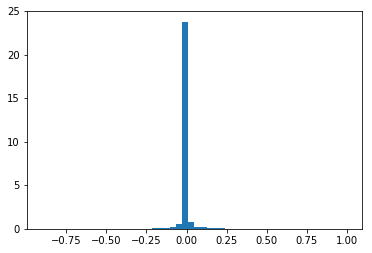

In [114]:
# гистограмма распределения
pl.hist(delta_1, bins=50, density=True);

У дисперсии остатков есть нелинейная параболическая (с ветвями вниз) зависимость от 2-го, 3-го и 4-го лагов.

Wall time: 6.18 s


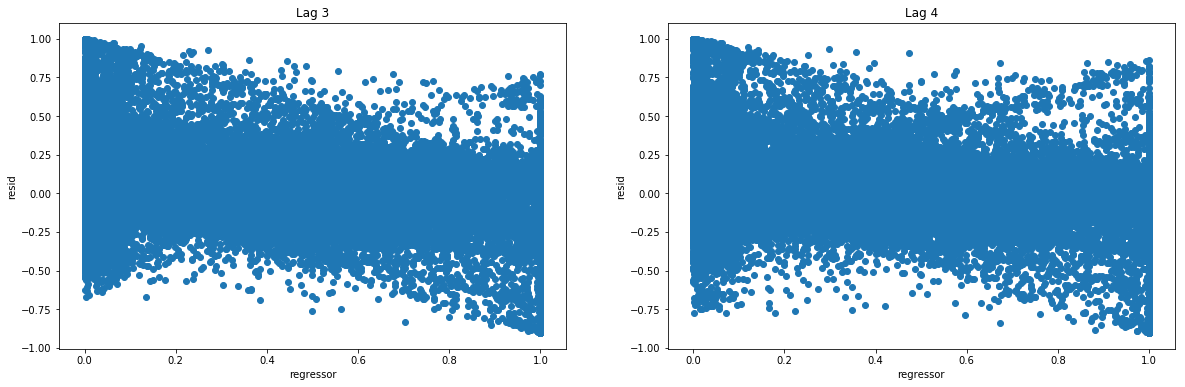

In [96]:
# рисую распределение остатков от доли второго лага
%%time
fig, axs = pl.subplots(1, 2, figsize=(20,6));

axs[0].scatter(X.iloc[:, 2].values, delta_1.values);
axs[0].set_title('Lag 3');

axs[1].scatter(X.iloc[:, 3].values, delta_1.values);
axs[1].set_title('Lag 4');

for ax in axs.flat:
    ax.set(xlabel='regressor', ylabel='resid')

In [89]:
from statsmodels.stats.diagnostic import het_white

white_res = het_white(delta_1, X)

print("p-value:", white_res[-1])

p-value: 0.0


Так как тест Уайта отклонил гипотезу о независимости от регрессоров, то пользоваться МНК-моделю не стоит. Как вариант, можно попробовать использовать регрессию по методу WLS, где в качестве весов будет парабола ветвями вниз от 3-го лага.

In [141]:
# создаю веса в виде параболы ветвями вниз
w = - X.iloc[:, 2] ** 2 + X.iloc[:, 2] + .01
model_2 = sm.WLS(y, X, weights = w).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.795
Model:                            WLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.972e+06
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:             1.8336e+06
No. Observations:             2029311   AIC:                        -3.667e+06
Df Residuals:                 2029306   BIC:                        -3.667e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0017   6.69e-05     24.922      0.000       0.002       0.002
share_lag_1     0.6998      0.001   1082.383      0.000       0.699       0.701
share_lag_2     0.0847      0.001    154.105      0.000       0.084       0.086
share_lag_3     0.1058      0.001    136.926      0.000       0.104       0.107
share_lag_4     0.0335      0.001     51.039      0.000       0.032       0.035
==============================================================================
Omnibus:                  2060883.249   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4856214260.120
Skew:                           3.841   Prob(JB):                         0.00
Kurtosis:                     242.528   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# Искомая переменная по второй модели
delta_2 = y - model_2.predict(X)

Ну, стало чуть-чуть получше.

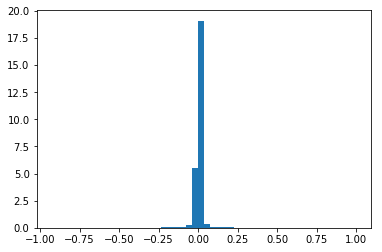

In [143]:
pl.hist(delta_2, bins=50, density=True);

По картине тяжело сказать, изменилось ли что-нибудь.

Wall time: 6.56 s


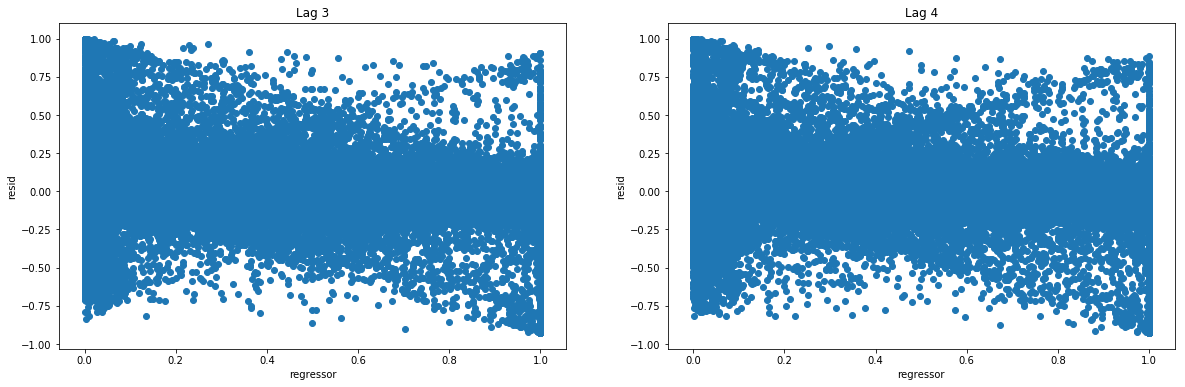

In [144]:
%%time
fig, axs = pl.subplots(1, 2, figsize=(20,6));

axs[0].scatter(X.iloc[:, 2].values, delta_2.values);
axs[0].set_title('Lag 3');

axs[1].scatter(X.iloc[:, 3].values, delta_2.values);
axs[1].set_title('Lag 4');

for ax in axs.flat:
    ax.set(xlabel='regressor', ylabel='resid')

Тест Уайта показывает, что гетероскедастичность никуда не делась.

In [145]:
white_res = het_white(delta_2, X)

print("p-value:", white_res[-1])

p-value: 0.0


Кстати, обычный МНК на тех же весах, что и WLS показывает выдающийся R2-Adjusted при их скалировании. Так, конечно, делать не стоит, мы ведь не за метриками гонимся.

In [151]:
w = - X.iloc[:, 2] ** 2 + X.iloc[:, 2] + 10
model_3 = sm.OLS(y, X, weights = 100 * w).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.244e+09
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:09:29   Log-Likelihood:             3.2958e+06
No. Observations:             2029311   AIC:                        -6.592e+06
Df Residuals:                 2029306   BIC:                        -6.592e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0012   3.45e-05     35.881      0.000       0.001       0.001
share_lag_1     0.4978      0.001    704.030      0.000       0.496       0.499
share_lag_2     0.2261      0.001    293.321      0.000       0.225       0.228
share_lag_3     0.1270      0.001    169.369      0.000       0.126       0.128
share_lag_4     0.0491      0.001     80.878      0.000       0.048       0.050
==============================================================================
Omnibus:                  1662412.703   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1107361031.753
Skew:                           2.793   Prob(JB):                         0.00
Kurtosis:                     117.303   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Заметим, что каждая из моделей, тем не менее, значимы, как и все коэффициенты в них (только взгляните на эти t-статистики!). Заметим, что все коэффициенты положительны и в сумме почти дают 1. Больший вес, почти половина, как и значимость приходится на первый лаг, и далее по убыванию.

Ради интереса проверим коэффициенты на то, что они в сумме дают 1.

In [183]:
# Я не очень уверен, что правильно ввел аргументы метода, но вроде бы все верно
model_3.f_test(([0, 1, 1, 1, 1], [1]))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[84835.85027333]]), p=0.0, df_denom=2.03e+06, df_num=1>

Как можно заметить, отвергается гипотеза об ограниченной модели.

# Модель с похожими инвесторами

Посчитаем матрицу похожести между фондами.

In [7]:
%%time
# Создаю таблицу соответствия 
df['cik_period'] = df.cik.apply(str) + '_' + df.period.apply(str)
pivot_df = df.pivot_table(index='cik_period', columns='investor_id', values='share', aggfunc=np.sum, fill_value=0)

Wall time: 1min 36s


In [ ]:
%%time
sim_matrix = pivot_df.corr()